<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 





##Solucion punto 1.

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

#Creamos el dataframe con los datos de tiempo y corriente
t= np.array([1.00,1.01,1.02,1.03,1.04])
i= np.array([3.10,3.12,3.14,3.18,3.24])
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo')
df

,Unnamed: 0,Corriente,tiempo
0,0,0.000000,0.00000
1,1,0.014533,0.10101
2,2,0.028854,0.20202
3,3,0.042967,0.30303
4,4,0.056875,0.40404
...,...,...,...
95,95,0.751104,9.59596
96,96,0.754721,9.69697
97,97,0.758285,9.79798
98,98,0.761798,9.89899


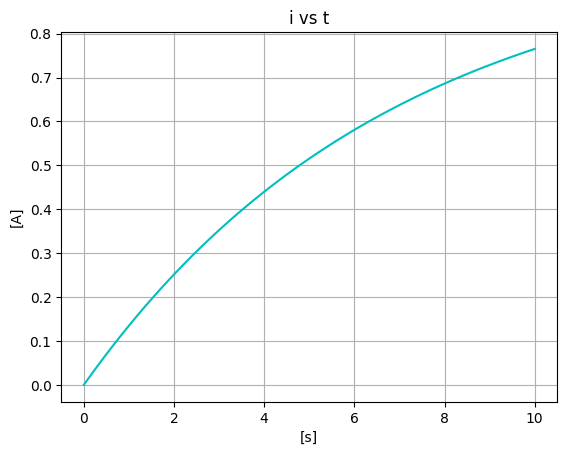

In [17]:
i=df['Corriente']
t=df['tiempo']
plt.plot(t,i,'c')
plt.xlabel('[s]')
plt.ylabel('[A]')   
plt.title('i vs t')
plt.grid()

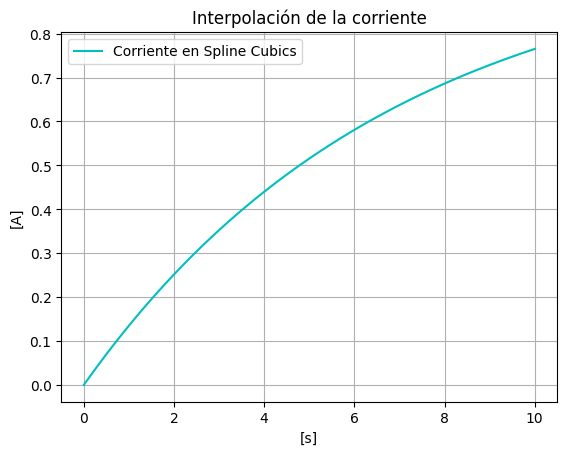

In [18]:
i_=CubicSpline(t,i)
t_=np.linspace(np.min(t),np.max(t),100)
f=i_(t_)
plt.title('Interpolación de la corriente')
plt.plot(t_,f,'c',label='Corriente en Spline Cubics')
plt.xlabel('[s]')
plt.ylabel('[A]')
plt.legend()
plt.grid()

In [19]:
df['Derivada'] = df['Corriente'].diff() / df['tiempo'].diff()
df

,Unnamed: 0,Corriente,tiempo,Derivada
0,0,0.000000,0.00000,NaN
1,1,0.014533,0.10101,0.143872
2,2,0.028854,0.20202,0.141781
3,3,0.042967,0.30303,0.139721
4,4,0.056875,0.40404,0.137690
...,...,...,...,...
95,95,0.751104,9.59596,0.036337
96,96,0.754721,9.69697,0.035809
97,97,0.758285,9.79798,0.035289
98,98,0.761798,9.89899,0.034776


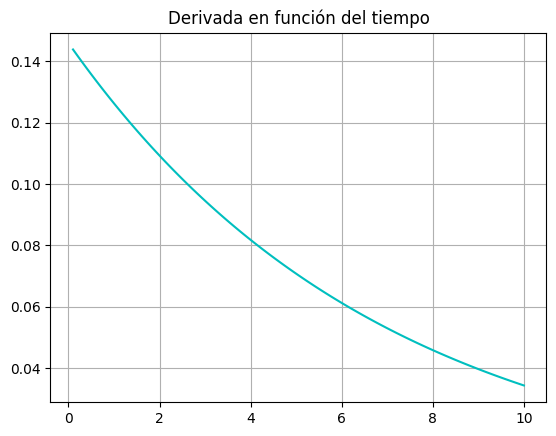

In [20]:
di=df['Derivada']
plt.plot(t_,di,'c')
plt.title('Derivada en función del tiempo')
plt.grid()

Ahora usamos los valores dados y buscamos el voltaje de la fem del sistema:
\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

In [21]:
def voltaje(di,i):
  L=0.98
  R=0.142
  return L*di+R*i

v= voltaje(di,df.Corriente)
v

0          NaN
1     0.143058
2     0.143043
3     0.143028
4     0.143013
        ...   
95    0.142267
96    0.142263
97    0.142260
98    0.142256
99    0.142252
Length: 100, dtype: float64

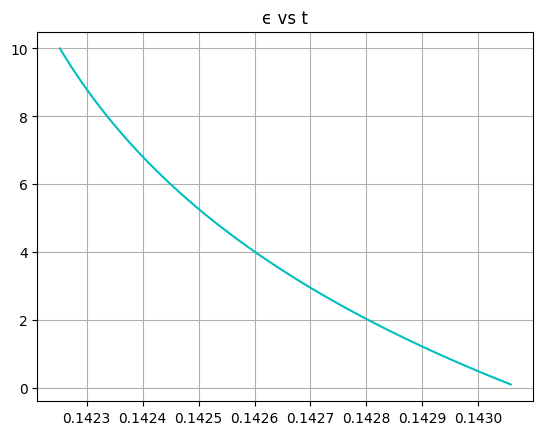

In [22]:
plt.title('ϵ vs t')
plt.plot(v,t_,'c')
plt.grid()


# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

# **Código markdown:**
**1. Regla del trapecio:**\
El valor aproximado de la integral se puede calcular mediante la fórmula del trapecio:

\begin{equation}
\int_{a}^{b} f(x) \approx \frac{b-a}{2} \left[f(a) + f(b)\right]
\end{equation}

donde $a$ y $b$ son los límites de integración, $f(x)$ es la función a integrar y $\approx$ significa "aproximadamente igual a".

**2. Regla del simpson:**\
El valor aproximado de la integral se puede calcular mediante la fórmula de Simpson:

\begin{equation}
\int_{a}^{b} f(x) \approx \frac{b-a}{6} \left[f(a) + 4f\left(\frac{a+b}{2}\right) + f(b)\right]
\end{equation}

donde $a$ y $b$ son los límites de integración, $f(x)$ es la función a integrar y $\approx$ significa "aproximadamente igual a".

**3. Método de cuadratura:**\
El valor aproximado de la integral se puede calcular mediante la fórmula de cuadratura:

\begin{equation}
\int_{a}^{b} f(x) \approx \sum_{i=1}^{n} w_i f(x_i)
\end{equation}

donde $a$ y $b$ son los límites de integración, $f(x)$ es la función a integrar, $n$ es el número de nodos de cuadratura, $x_i$ son los nodos y $w_i$ son los pesos asociados a cada nodo.






4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!-- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

In [ ]:
from scipy.integrate import trapz
from scipy.integrate import simpson
from scipy.integrate import quad
from scipy import optimize



- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$


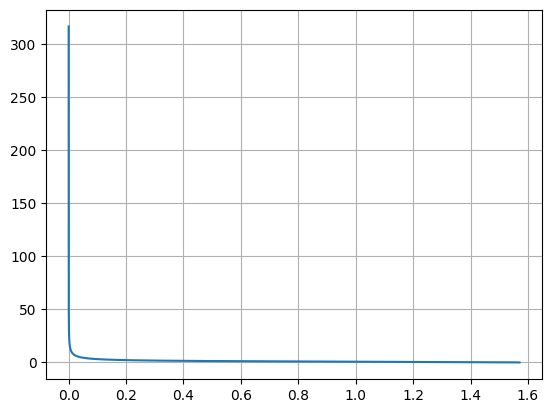

In [ ]:
f1= lambda x: 1/(np.sqrt(np.tan(x)))
a=0
b=np.pi/2
N=1000000
eps=1e-5
x=np.linspace(a+eps,b-eps,N+1)
h=(b-a)/N
plt.plot(x,f1(x))
plt.grid()

In [ ]:
print('Método trapecio:',trapz(f1(x),x,dx=h))

Método trapecio: 2.2151201386802084


In [ ]:
print('Método simpson:',simpson(f1(x),x,dx=h))

Método simpson: 2.215116911877277


In [ ]:
integral, error = quad(f1,a,b)
print('Método cuadratura:',integral, 'y su error de:', error)

Método cuadratura: 2.2214414690792026 y su error de: 4.1406478246130973e-10



$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$



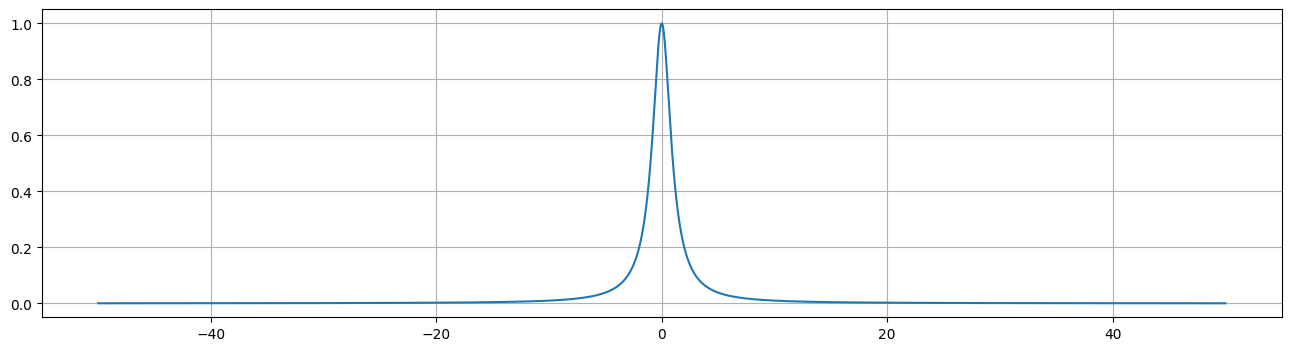

In [ ]:
f2= lambda x: 1/(1+x**2)
a=-4000
b=4000
N=1000000
x=np.linspace(a+eps,b-eps,N+1)
x_=np.linspace(-50,50,N+1)
h=(b-a)/N
plt.figure(figsize=(16,4))
plt.plot(x_,f2(x_))
plt.grid()

In [ ]:
print('Método trapecio:',trapz(f2(x),x,dx=h))

Método trapecio: 3.141092653598961


In [ ]:
print('Método simpson:',simpson(f2(x),x,dx=h))

Método simpson: 3.1410926535989607


In [ ]:
integral, error = quad(f2,-np.inf,np.inf)
print('Método cuadratura:',integral, 'y su error de:', error)

Método cuadratura: 3.141592653589793 y su error de: 5.155583041103855e-10


Error en el método del trapecio:

In [ ]:
import sympy as sp

f_s= lambda x: 1/(1+x**2)

x=sp.symbols('x')
#primera derivada:
d1=sp.diff(f_s(x),x,1)
d1

-2*x/(x**2 + 1)**2

In [ ]:
#Segunda derivada:
d2=sp.diff(f_s(x),x,2)
d2

2*(4*x**2/(x**2 + 1) - 1)/(x**2 + 1)**2

In [ ]:
f_n1=sp.lambdify(x,d1,'numpy')
f_n2=sp.lambdify(x,-d2,'numpy')
x_=np.linspace(-1,1)

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 2
         Function evaluations: 33
[-0.5        -0.49732585 -0.4885615  -0.47250482 -0.44784541 -0.41318756
 -0.36708724 -0.30810613 -0.23488535 -0.14624069 -0.04127957  0.08046279
  0.21887355  0.37310912  0.54145311  0.72120496  0.90862114  1.09893231
  1.28645595  1.46481659  1.62727302  1.767136    1.87824238  1.95543733
  1.99500728  1.99500728  1.95543733  1.87824238  1.767136    1.62727302
  1.46481659  1.28645595  1.09893231  0.90862114  0.72120496  0.54145311
  0.37310912  0.21887355  0.08046279 -0.04127957 -0.14624069 -0.23488535
 -0.30810613 -0.36708724 -0.41318756 -0.44784541 -0.47250482 -0.4885615
 -0.49732585 -0.5       ]


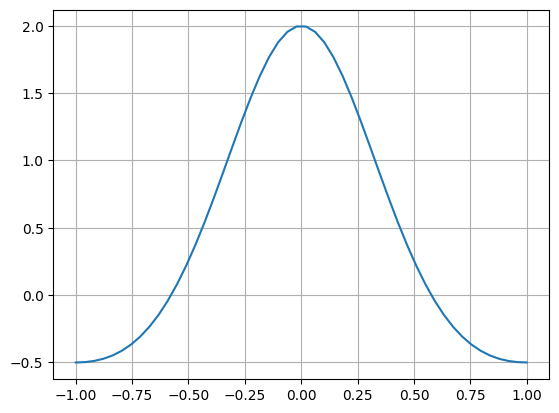

In [ ]:
fo=optimize.fmin_powell(f_n2,0.1,ftol=1e-7)

print(f_n2(x_))
plt.plot(x_,f_n2(x_))
plt.grid()

In [ ]:
max=np.max(f_n2(x_))
max

1.9950072824182459

In [ ]:
h=np.sqrt(6*eps)
print('El tamaño de cada paso es: %.5lf' %h)
print('El número de intervalos es: %5lf' %((b-a)/h))

El tamaño de cada paso es: 0.00775
El número de intervalos es: 1032795.558989


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dydx
 $$


In [ ]:
a, b = 0, np.pi/4
N=100
x = np.linspace(a, b, N)

def g(y):
  return (2*y*np.sin(x) + np.cos(2*x)**2)

In [ ]:
integral_t = np.zeros_like(x)
integral_s = np.zeros_like(x)
for i in range(len(x)):
  y = np.linspace(np.sin(x[i]), np.cos(x[i]), N)
  integral_t[i] = trapz(g(y), y)
  integral_s[i] = simpson(g(y), y)

# Integramos la función resultante en x
integralt = trapz(integral_t, x)
integrals = simpson(integral_s, x)

print("Método trapecio:", integralt)
print("Método simpson:", integrals)

Método trapecio: 0.427555799166781
Método simpson: 0.42755386004751816


In [ ]:
def f3(y, x):
  return (2*y*np.sin(x) + np.cos(2*x)**2)

def int_q(x):
  return quad(f3, np.sin(x), np.cos(x), args=(x))[0]

integralq, error= quad(int_q, a, b)

print('Método cuadratura:',integralq, 'y su error de:', error)

Método cuadratura: 0.4256517540566823 y su error de: 4.725683778258131e-15


Utilizando un método de doble integral de la librería scipy, encontrado usando chat gpt, confirmamos los resultados obtenidos anteriormente:

In [ ]:
from scipy.integrate import dblquad

def f_(y, x):
  return (2*y*np.sin(x) + np.cos(2*x)**2)

a, b = 0, np.pi/4

integral, error = dblquad(f_, a, b, lambda x: np.sin(x), lambda x: np.cos(x))

print("Valor de la integral: ", integral)

Valor de la integral:  0.4256517540566823


5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$


In [ ]:
k = lambda x, m: 1/np.sqrt(1 - m*np.sin(x)**2)

a = 0
b = np.pi/2
eps = 3e-5

def eliptica(m):
  m1 = 1 - m
  a0,b0 = 1.3862944, 0.5
  a1,b1 = 0.1119723, 0.1213478
  a2,b2 = 0.00725296, 0.0288729
  i= lambda x: k(x, m)
  integral, error = quad(i, a, b)
  polin = a0 + a1*m1 + a2*m1- (b0 + b1*m1 + b2*m1**2)*np.log(m1)+error
  if error <= eps and 0<= m <= 1:
    print('El valor de integral', integral, 'y el valor de la aproximación polinomial es de:', polin)
    print('La diferencia entre la aproximación y el resultado de la integral es de:', np.abs(polin-integral))
    print('El ϵ(m) es de:', error)
  else:
    print('Error, ingrese un número entre el intervalo dado')

m=float(input('Ingrese un número entre 0 y 1: '))
eliptica(m)

Ingrese un número entre 0 y 1: 0.655
El valor de integral 2.0138893144920713 y el valor de la aproximación polinomial es de: 2.0077429877925557
La diferencia entre la aproximación y el resultado de la integral es de: 0.006146326699515647
El ϵ(m) es de: 1.864246533124279e-10


6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parámetros
a = 1.0
I = 3.0
mu_0 = 1

# Funciones de integración
def K(phi, k):
  return 1 / np.sqrt(1 - k * np.sin(phi)**2)

def E(phi, k):
  return np.sqrt(1 - k * np.sin(phi)**2)

# Función para calcular Aϕ(r, θ)
def A(r, theta):
  k = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))

  # Cálculo de la integral K(k)
  k_i, error_k = quad(K, 0, np.pi/2, args=(k,))

  # Cálculo de la integral E(k)
  e_i, error_e = quad(E, 0, np.pi/2, args=(k,))

  A_phi = (mu_0*4*I * a) / (np.sqrt((a**2 + r**2 + 2*a*r*np.sin(theta))))*((2 - k) * k_i - 2 * e_i)/k
  return A_phi

<ipython-input-24-3b7209a16f5b>:27: RuntimeWarning: invalid value encountered in double_scalars
  A_phi = (mu_0*4*I * a) / (np.sqrt((a**2 + r**2 + 2*a*r*np.sin(theta))))*((2 - k) * k_i - 2 * e_i)/k


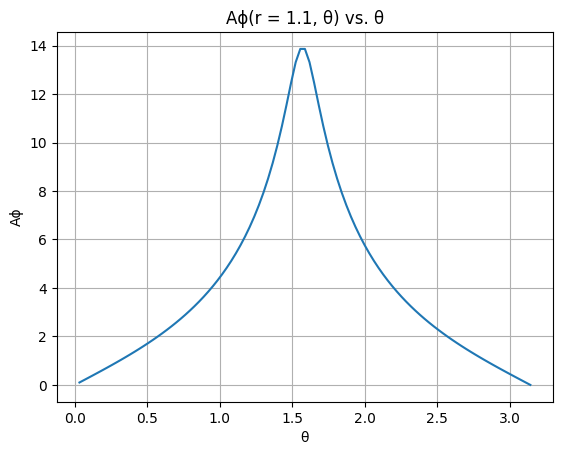

In [ ]:
#@title a) Aϕ(r = 1.1, θ) vs. θ
r_value = 1.1
theta_values = np.linspace(0, np.pi, 100)
A_phi_values = [A(r_value, theta) for theta in theta_values]

plt.plot(theta_values, A_phi_values)
plt.xlabel('θ')
plt.ylabel('Aϕ')
plt.title('Aϕ(r = 1.1, θ) vs. θ')
plt.grid()
plt.show()

<ipython-input-24-3b7209a16f5b>:27: RuntimeWarning: invalid value encountered in double_scalars
  A_phi = (mu_0*4*I * a) / (np.sqrt((a**2 + r**2 + 2*a*r*np.sin(theta))))*((2 - k) * k_i - 2 * e_i)/k


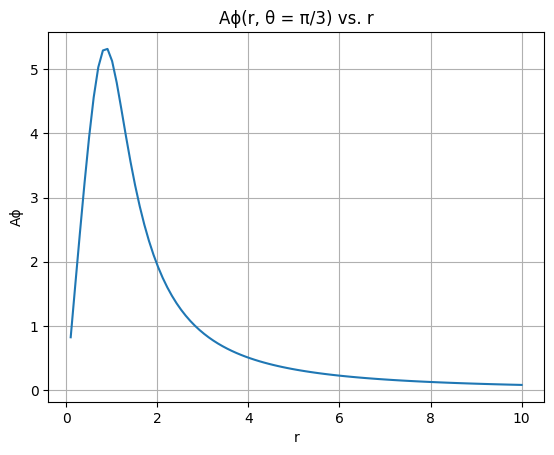

In [ ]:
#@title b) Aϕ(r, θ = π/3) vs. r
theta_value = np.pi / 3
r_values = np.linspace(0, 10, 100)
A_phi_values = [A(r, theta_value) for r in r_values]

plt.plot(r_values, A_phi_values)
plt.xlabel('r')
plt.ylabel('Aϕ')
plt.title('Aϕ(r, θ = π/3) vs. r')
plt.grid()
plt.show()

# **Clase:**

In [ ]:
f= lambda x: 1/(np.sqrt(np.tan(x)))

N=100
epsilon=1E-4

#Calcula la integral para un num de puntos N en el intervalo dado por epsilon
@np.vectorize
def integral_trap(N,epsilon):
  x=np.linspace(0+epsilon,np.pi/2-epsilon,N)
  area=trapz(f(x),x)
  return area

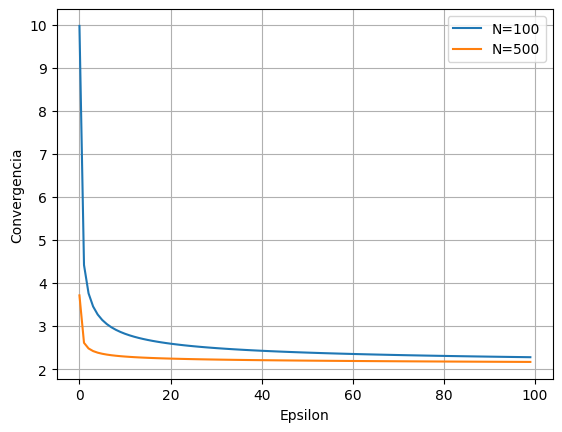

In [ ]:
ep=np.linspace(1E-6,1E-3,100)
t1=integral_trap(100,ep)
t2=integral_trap(500,ep)
plt.plot(t1,label='N=100')
plt.plot(t2, label='N=500')
plt.xlabel('Epsilon')
plt.ylabel('Convergencia')
plt.legend()
plt.grid()

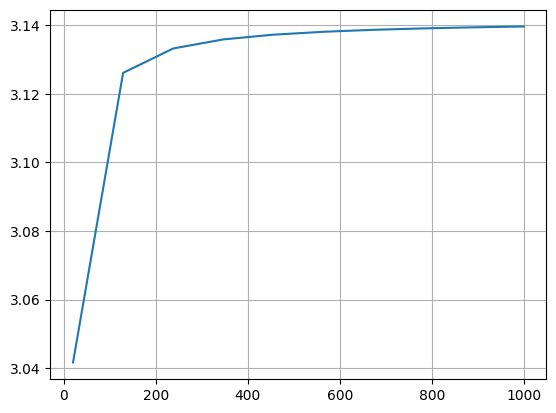

In [ ]:
f= lambda x: 1/(1+x**2)
a=np.linspace(20,1000,10)
area=[]
for a_ in a:
  x=np.linspace(-a_,a_,10000)
  area.append(trapz(f(x),x))

plt.plot(a,np.array(area))
plt.grid()